In [7]:
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

df = pd.read_excel('./data4/시도별 전출입 인구수.xlsx', fillna=0, header=0)
df = df.fillna(method='ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')

df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

col_years = list(map(str, range(2010, 2018)))
df = df_seoul.loc[['충청남도', '경상북도', '강원도', '부산광역시'], col_years]
df['합계'] = df.sum(axis=1)

df.head()

,2010,2011,2012,2013,2014,2015,2016,2017,합계
전입지,,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020,179533.0
경상북도,16042,15818,15191,14420,14456,15113,14236,12464,117740.0
강원도,22736,23624,22332,20601,21173,22659,21590,21016,175731.0
부산광역시,17418,18816,16135,16153,17320,17009,15062,14484,132397.0


In [4]:
df_total = df[['합계']].sort_values(by='합계', ascending=True)
df_total.head()
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 경상북도 to 충청남도
Data columns (total 1 columns):
합계    4 non-null float64
dtypes: float64(1)
memory usage: 64.0+ bytes


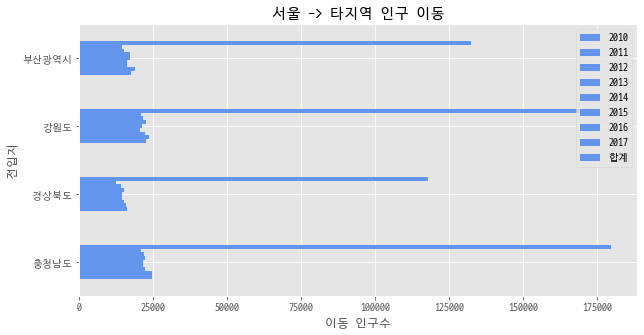

In [10]:
plt.style.use('ggplot')

# 마이너스 폰트 깨짐 현상 수정
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
path = '/usr/share/fonts/truetype/naver-d2coding/D2Coding-Ver1.3.2-20180524-all.ttc'
font_name = fm.FontProperties(fname=path, size=15).get_name()
plt.rc('font', family=font_name)

df.plot(kind='barh', figsize=(10, 5), width=0.5, color='cornflowerblue')

plt.title('서울 -> 타지역 인구 이동')
plt.xlabel('이동 인구수')
plt.ylabel('전입지')

plt.show()